# Proyek Data: Pengembangan Hotel Search Engine untuk DQLab Data

## 1. Approach modelling yang akan digunakan

Untuk ketiga kasus di dalam challenge DQlab kali ini, penulis menggunakan 2 model yang berbeda :
 1. Untuk kasus pertama, menggunakan <i><strong>model recommender sederhana</i></strong> yang berbasis pada weighted rating atau berdasarkan
    rating dari tiap hotel tersebut [1].
 2. Untuk kasus kedua dan ketiga menggunakan <i><strong>content-based recommender </strong></i> yang berdasarkan dari fitur/informasi
    dari tiap hotel yang berbeda [2]

## 2. ETL dan data cleansing
Data cleansing dilakukan kepada dataset untuk menghilangkan missing value /Nan serta merapikan nilai dari kolom price_per_night. Crawling data juga dilakukan untuk mendapatkan data hotel_city yang lebih akurat,karena masih ada hotel yang memiliki data hotel_city sebagai Jakarta saja. 

Secara umum Langkah ETL dan data cleansing yang saya lakukan di antara lain :

   1. Import library yang dibutuhkan
   2. Load file dataset data_hotel dan review_hotel yang diberikan ke dataframe terpisah
   3. Menghapus row data dengan missing value di masing-masing dataset
   4. Menghapus nilai desimal dan membulatkan angka price_per_night ke angka puluhan terdekat
   5. Crawling data hotel yang berada di Jakarta dari situs pegipegi.com untuk mendapat posisi hotel dengan data hotel_city = Jakarta yang lebih akurat

### Import library yang dibutuhkan

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kode di bawah agar grafik yang ditampilkan berada di tengah halaman (centered)

In [8]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Load dataset yang diberikan

In [37]:
hotel = pd.read_excel("data_hotel.xlsx")
review = pd.read_excel("review_hotel.xlsx")

#### Cleansing dataset hotel 

In [38]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
hotel_id             1199 non-null object
hotel_name           1199 non-null object
hotel_description    1098 non-null object
hotel_province       1199 non-null object
hotel_city           1199 non-null object
hotel_address        1199 non-null object
price_per_night      1193 non-null float64
dtypes: float64(1), object(6)
memory usage: 65.7+ KB


In [39]:
hotel.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


Terlihat bahwa di dataset hotel terdapat missing value di kolom description dan juga price per night. Juga kolom price_per_night masih memiliki angka desimal. Kita akan isi nilai null di kolom price dengan mean dari seluruh kolom dan menghapus data dengan missing value di kolom description

In [40]:
# menghapus string hotel_ di nama kolom
colname = [col.replace('hotel_','') for col in hotel.columns]
hotel.columns = colname

# mengisi nilai null di kolom price per night dengan nilai mean, dan melakukan pembulatan ke nilai puluhan terdekat  
hotel['price_per_night'] = hotel['price_per_night'].fillna(hotel.price_per_night.mean())
hotel['price_per_night'] = hotel['price_per_night'].apply(lambda x : int(round(x,-1)))

# menghapus data dengan nilai null di kolom description
hotel = hotel.dropna(subset=['description'])

In [41]:
hotel.head()

,id,name,description,province,city,address,price_per_night
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",325000
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310950
5,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276330


#### Mendapatkan lokasi kota hotel yang lebih akurat

Beberapa hotel yang berada di provinsi DKI Jakarta memiliki data kota Jakarta saja. Untuk mendapat data kota yang lebih tepat, maka saya melakukan crawling data ke situs pegi2 untuk menarik informasi tersebut. Data yang dikumpulkan disimpan ke dalam satu file bernama "Hotel Name.csv" dan digabungkan dengan data hotel. (kode python untuk crawling data ini dapat dilihat melalui link berikut https://gist.github.com/davidsirait/bdb95661e101b4897bf2d3c73be432c6)

In [42]:
# ambil hotel dengan kota Jakarta
hotel[hotel['city'] == 'Jakarta'].head()

,id,name,description,province,city,address,price_per_night
449,h0450,Kyriad Hotel Metro Kebayoran,"Kyriad Hotel Metro Kebayoran, sebuah penginapa...",DKI Jakarta,Jakarta,"Jl. Ciledug Raya No. 1, Cipulir, Jakarta, Indo...",515510
460,h0461,Maple Hotel Grogol,Penginapan Yang Tenang Dan Nyaman di Jakarta\n...,DKI Jakarta,Jakarta,"Jl. Daan Mogot Dalam Kali Sekertaris No.55, Gr...",326550
461,h0462,Posto Dormire,Penginapan yang nyaman dan tenang.\n \n Hotel ...,DKI Jakarta,Jakarta,"Jl. Dr Susilo Raya No.03, Grogol Petamburan, G...",398230
462,h0463,Red Planet Jakarta Pasar Baru,Hotel yang Strategis dan Terjangkau oleh Red P...,DKI Jakarta,Jakarta,"Jl. K.H.Samanhudi No.25, Pasar Baru, Jakarta, ...",334680
465,h0466,7 Days Premium Hotel,Pilihan akomodasi ideal untuk Wisatawan Bisnis...,DKI Jakarta,Jakarta,"Jl. Matraman Raya No. 173-175 Balimester, Jati...",319480


In [43]:
# load data nama-nama hotel dan lokasi hasil crawling
nama_hotel = pd.read_csv("Hotel Name.csv",index_col=0)
nama_hotel.head()

,Hotel Name,Kota
0,Kyriad Hotel Metro Kebayoran,Jakarta Selatan
1,Artotel Jakarta Thamrin,Jakarta Pusat
2,Cabin Hotel,Jakarta Utara
3,Mega Matra Hotel,Jakarta Timur
4,Park 5 Simatupang,Jakarta Selatan


Selanjutnya adalah menggabungkan dan mengganti data lokasi kota tersebut ke dataframe hotel di awal

In [44]:
# merubah nama kolom di dataframe nama_hotel
nama_hotel = nama_hotel.rename(columns={"Hotel Name":"name"})

#menggabungkan kedua dataframe dan mengganti lokasi kota hotel yang sesuai
hotel = pd.merge(hotel,nama_hotel,how='left',on='name')
hotel.loc[hotel['Kota'].notnull(),'city'] = hotel['Kota']
hotel.loc[hotel.city == 'Jakarta'].head()

,id,name,description,province,city,address,price_per_night,Kota
381,h0483,Zen Boutique Syariah Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta,"Jl. Kramat 6 No. 28 Rt. 001 Rw. 02 Kel., RT.2/...",143070,NaN
396,h0498,Clay Hotel Jakarta,Tempat yang tepat untuk wisatawan yang pintar\...,DKI Jakarta,Jakarta,"JL. Blora No. 20, Thamrin, Jakarta",353400,NaN
421,h0523,Hotel Santika Kelapa Gading Jakarta,Sebuah kemewahan Group Santika di Kelapa Gadin...,DKI Jakarta,Jakarta,"Mahaka Square Jl Kelapa Nias Raya Blok HF 3, K...",668330,NaN
423,h0525,Mercure Jakarta Gatot Subroto,-,DKI Jakarta,Jakarta,Jalan Gatot Subroto Kav. 1,670050,NaN
428,h0530,Hotel Belvena,"Penginapan yang Nyaman di daerah Mangga Besar,...",DKI Jakarta,Jakarta,"Jl. Mangga Besar No.49 A, Taman Sari, Jakarta,...",200000,NaN


Ternyata masih ada beberapa hotel yang nilai city nya masih Jakarta, yang berarti tidak berada di dalam data hasil crawling. Namun jika dilihat, rata-rata berada di kota Jakarta Pusat ataupun Jakarta Selatan. Oleh karena itu, value city akan diisi sebagian dengan Jakarta Pusat dan Jakarta Selatan

In [50]:
# mengganti data lokasi kota yang masih bernilai Jakarta dengan Jakarta Pusat dan Jakarta Selatan
hotel.loc[hotel[(hotel.city == 'Jakarta')].head(12).index,'city'] = 'Jakarta Pusat'
hotel.loc[hotel[(hotel.city == 'Jakarta')].head(12).index,'city'] = 'Jakarta Selatan'

# drop kolom Kota dari dataframe hotel
hotel = hotel.drop(columns='Kota')

#### Analisa dataset review 

In [58]:
review.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


In [96]:
# melihat berapa jumlah data dengan nilai NULL
review.isnull().sum()

booking_id       0
booking_date     0
hotel_id         0
hotel_name       0
stay_duration    0
adults           0
children         0
rating           0
review           0
dtype: int64

Untuk dataset review, terdapat 473 row data yang memiliki nilai NULL di kolom hotel_id dan akan di drop

In [109]:
# hapus string hotel_ di nama kolom di dalam dataset
colname = [col.replace('hotel_','') for col in review.columns]
review.columns = colname

# drop row data yang memiliki nilai NULL
review = review.dropna()

# Apakah rating penting?

Untuk case study pertama, pemodelan akan menggunakan simple recommender engine yang memberikan rekomendasi berdasarkan rating yang dimiliki hotel tersebut. Namun, tidak semua hotel memiliki nilai setara, karena tiap hotel memiliki count/jumlah tamu yang memberikan rating yang berbeda-beda, seperti ditunjukkan di bawah:

In [132]:
review_rating = review.groupby('name').agg({'id':'size','rating':'mean'}).rename(columns={'id':'count',}).reset_index()
review_rating.sort_values(by='count',ascending = False)

,name,count,rating
163,Hotel Cemerlang,20,8.28
209,InterContinental Bandung Dago Pakar,20,9.52
365,Valore Hotel,20,7.48
359,U Janevalla Bandung,20,8.28
367,Verona Palace Hotel,20,8.32
...,...,...,...
97,Front One Residence Syariah Mampang,1,10.00
84,Ethan Hotel,1,10.00
50,Barito Mansion,1,9.60
20,Amaris Hotel Slipi,1,8.40


Terlihat bahwa beberapa hotel memiliki jumlah vote (count) sebanyak 20, artinya terdapat 20 user yang memberikan nilai ke hotel tersebut. Namun ada juga hotel yang memiliki hanya 1 vote saja, sehingga ada kemungkinan hotel yang secara umum lebih populer dan dituju banyak orang ratingnya berada di bawah hotel yang hanya disukai segelintir orang saja . Sebagai contoh dari data di atas, InterContinental Bandung Dago Pakar dengan rating 9,52 dari 20 vote jika diurutkan berdasarkan rating saja akan berada di bawah Ethan Hotel yang memiliki rating 10, namun berasal dari 1 vote.

### Mengolah data rating untuk dimasukkan ke model

Mengikuti referensi simple recommender engine, maka pemodelan dapat menggunakan rumus Weighted Rating IMDB yaitu :

![title](RatingIMDB.jpg)

Dimana : <br>
<strong>v</strong> adalah jumlah vote (count) yang diterima hotel tersebut <br>
<strong>m</strong> jumlah minimum vote yang dibutuhkan agar dapat masuk ke dalam perhitungan<br>
<strong>R</strong> adalah rating rata-rata dari hotel itu sendiri ,dan <br>
<strong>C</strong> adalah rata-rata dari <b>keseluruhan hotel </b> di dalam dataset <br>

v dan R sudah terdapat di dalam dataset review_rating,sementara nilai C dapat kita cari menggunakan metoda mean() terhadap dataset review, dan R didapat berdasarkan data count dari berapa kali hotel muncul di dataset yang ada di dalam dataset.
Metode Weighted Rating ini dirasa secara matematis cukup sederhana serta memperhitungkan rating serta jumlah vote yang didapat hotel tersebut secara lebih adil.

### Nilai rating untuk pemodelan content-based recommender 

Pemodelan content-based menggunakan deskripsi/informasi dari beberapa fitur untuk merekomendasikan item yang memiliki kemiripan dengan informasi yang digunakan sebelumnya. Metode ini pada umumnya menggunakan konsep vector space model, yang intinya merubah text ke dalam representasi aljabar berbentuk vektor. Sehingga, nilai rating yang berbentuk integer <strong>tidak terlalu berpengaruh</strong> untuk pemodelan ini karena lebih berfokus pada data implisit seperti teks

# EXPLORATORY DATA ANALYSIS

## Hotel Analysis 

### Harga hotel berdasarkan provinsi

Pertama-tama kita lihat informasi mengenai kolom price_per_night di dataframe hotel

In [68]:
hotel.describe()

,price_per_night
count,1.099000e+03
mean,4.464514e+05
std,3.167256e+05
min,7.723000e+04
25%,2.550000e+05
50%,3.612500e+05
75%,5.159300e+05
max,4.047660e+06


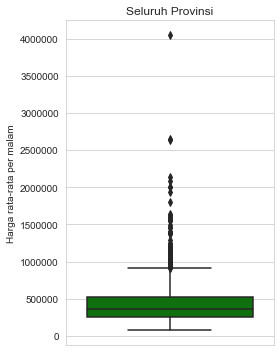

In [78]:
# box plot untuk melihat distribusi dari harga rata-rata per malam seluruh hotel
plt.figure(1,figsize = (4,5))
sns.set_style('whitegrid')
sns.boxplot(hotel['price_per_night'],color='green',orient='v')
plt.title('Seluruh Provinsi')
plt.ylabel('Harga rata-rata per malam')
plt.tight_layout()

Terlihat bahwa harga rata-rata maksimum yang tercatat adalah sekitar 4 juta rupiah per malam. Nilai ini jauh berada di atas quartile ke -3 (75%) yang berada di angka sekitar 520 ribu rupiah. Sementara itu rata-rata hotel di seluruh daerah mematok tarif per malam sekitar 460 ribu rupiah, dan sekitar 50 % dari total seluruh hotel berada di sekitar angka ini. Dapat disimpulkan bahwa sebagian besar hotel memasang tarif yang cukup terjangkau untuk bersaing, meskipun ada juga hotel yang berada sebagai outlier dan memiliki tarif di atas 1 juta per malamnya

Untuk mendapat gambaran lebih jelas kita bisa melihat bagaimana persebaran harga hotel per malam berdasarkan provinsi dan juga kota, dengan cara melakukan grouping per dan di plotting dengan box plot

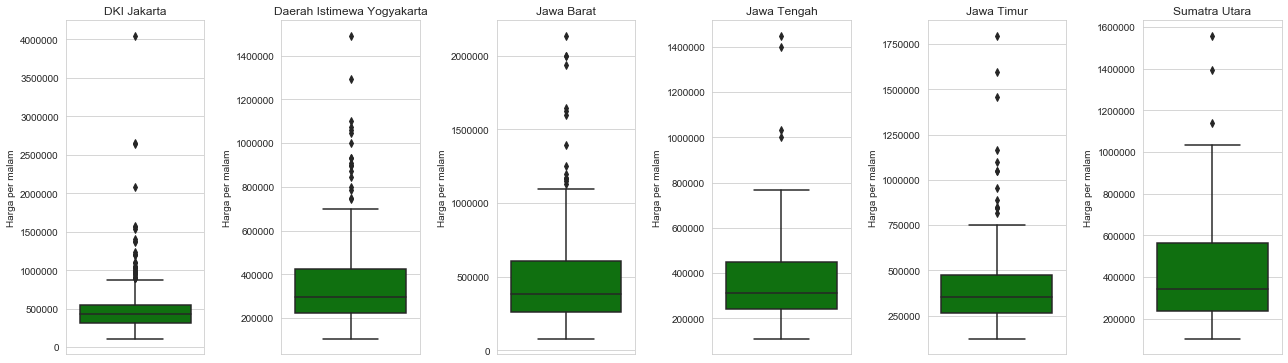

In [79]:
# grouping berdasarkan provinsi 
hotel_province = hotel[['province','price_per_night']]
hotel_province = hotel_province.groupby('province')['price_per_night'].apply(list).reset_index(name = 'harga')

#plotting boxplot untuk distribusi harga per malam 
data = hotel_province['harga']
number_of_columns=6
number_of_rows = len(data)-1/number_of_columns
plt.figure(figsize=(3*number_of_columns,5*number_of_rows))
for i in range(0,len(data)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[i],color='green',orient='v')
    plt.title(hotel_province['province'][i])
    plt.ylabel('Harga per malam')
    plt.tight_layout()

Dari grafik terlihat bahwa Jakarta memiliki tarif rata-rata yang paling tinggi di antara semua daerah, dan juga hotel kelas atas yang harga per malamnya berada di atas 2 juta per malam. Sumatra Utara memiliki range harga yang paling tinggi, terlihat dari cakupan box hijau yang berada di antara 220 - 580 ribu. Namun, hanya sedikit hotel di Sumatra yang memiliki tarif jauh di luar rata-rata. Sementara,harga kamar hotel di DI yogyakarta secara umum persebarannya lebih rendah dibandingkan daerah lain, disusul oleh Jawa Tengah. Namun, di Yogyakarta masih banyak hotel yang harga per malamnya dapat dianggap jauh di atas rata-rata(outlier)

### Harga hotel berdasarkan kota

Berikutnya kita akan membandingkan persebaran tarif kamar per malam berdasarkan lokasi kota tempat hotel berada

In [85]:
# grouping kembali hotel berdasarkan provinsi untuk dibandingkan dengan berdasarkan kota
hotel_grup_province = pd.DataFrame(hotel.groupby('province').agg({'id':'size','price_per_night':'mean'})
                                   .rename(columns={'id':'count',}).reset_index()).replace('Daerah Istimewa Yogyakarta','D.I Yogyakarta')

# grouping berdasarkan kota dan cari harga rata-rata kamar per malam
hotel_grup_city = pd.DataFrame(hotel.groupby('city').agg({'id':'size','price_per_night':'mean',
                                                              'province':lambda x: x.unique().tolist()})
                                   .rename(columns={'id':'count',}).reset_index())
hotel_grup_city = hotel_grup_city.sort_values(by ='province',ascending = True)
hotel_grup_city

,city,count,price_per_night,province
1,Jakarta Barat,48,419305.208333,[DKI Jakarta]
2,Jakarta Pusat,118,469545.254237,[DKI Jakarta]
3,Jakarta Selatan,106,600674.528302,[DKI Jakarta]
4,Jakarta Timur,15,622904.666667,[DKI Jakarta]
5,Jakarta Utara,26,467457.692308,[DKI Jakarta]
6,Jogja,224,368825.000000,[Daerah Istimewa Yogyakarta]
0,Bandung,214,495669.439252,[Jawa Barat]
9,Semarang,87,360722.413793,[Jawa Tengah]
10,Solo,59,390477.627119,[Jawa Tengah]
7,Malang,57,527574.035088,[Jawa Timur]


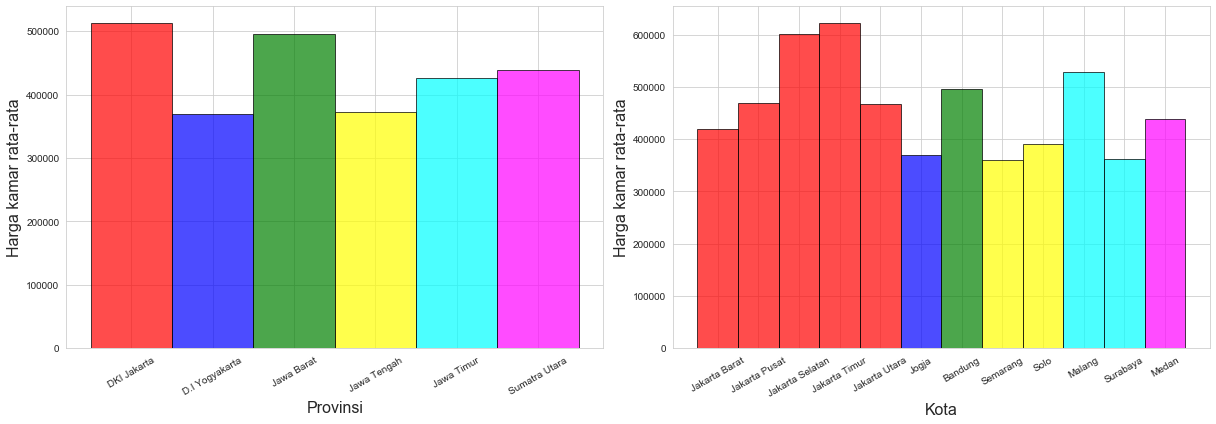

In [87]:
# plot harga kamar rata-rata berdasarkan provinsi dan juga kota
plt.figure(1,figsize = (17,6))
plt.subplot(121)
plt.bar(hotel_grup_province['province'], hotel_grup_province['price_per_night'],
        label = 'Harga kamar rata-rata per provinsi', color = ['red','blue','green','yellow','cyan','magenta'], 
        width = 1, align = 'center', alpha = 0.7,edgecolor = 'black')
plt.xlabel('Provinsi', fontsize = 16)
plt.ylabel('Harga kamar rata-rata', fontsize = 16)
plt.xticks(rotation=30)

plt.subplot(122)
plt.bar(hotel_grup_city['city'], hotel_grup_city['price_per_night'],
        label = 'Harga kamar rata-rata per kota', color = ['red','red','red','red','red','blue','green',
                                                          'yellow','yellow','cyan','cyan','magenta']
        ,  width = 1, align = 'center', alpha = 0.7,edgecolor = 'black')
plt.xlabel('Kota', fontsize = 16)
plt.ylabel('Harga kamar rata-rata', fontsize = 16)
plt.xticks(rotation=30)
plt.tight_layout()

Hotel di Jakarta Timur memiliki tarif rata-rata yang paling tinggi, disusul hotel di daerah Jakarta Selatan yang notabene memiliki beberapa daerah bisnis dan juga perbelanjaan. Sementara, terlihat bahwa kota di kota Malang tarif hotel per malamnya relatif lebih tinggi dibanding daerah-daerah lainnya dan cukup kontras dengan Surabaya yang merupakan ibukota provinsi Jawa Timur. Sementara kota Jogja, sebagai tujuan destinasi wisata memiliki tarif rata-rata yang paling rendah di antara kota-kota lainnya. Maka jika ingin melakukan perjalanan wisata dengan budget terbatas, kota Jogja dapat menjadi pilihan

### Data deskripsi Hotel

Berikutnya kita akan menganalisa kolom deskripsi untuk melihat bagaimana cara hotel memasarkan dirinya kepada calon pengunjung potensial

In [90]:
# membuat copy dari dataframe hotel untuk analisa kolom description
hotel_test = hotel.copy()
hotel_test['jumlah_kata'] = hotel_test['description'].apply(lambda x: len(str(x).split()))
desc_lengths = list(hotel_test['jumlah_kata'])
print("Jumlah hotel yang memiliki deskripsi:", len(desc_lengths),
    "\nJumlah kata rata-rata", np.average(desc_lengths),
      "\nJumlah kata maksimum", max(desc_lengths),
      "\nJumlah kata minimum", min(desc_lengths))

Jumlah hotel yang memiliki deskripsi: 1099 
Jumlah kata rata-rata 39.21565059144677 
Jumlah kata maksimum 74 
Jumlah kata minimum 1


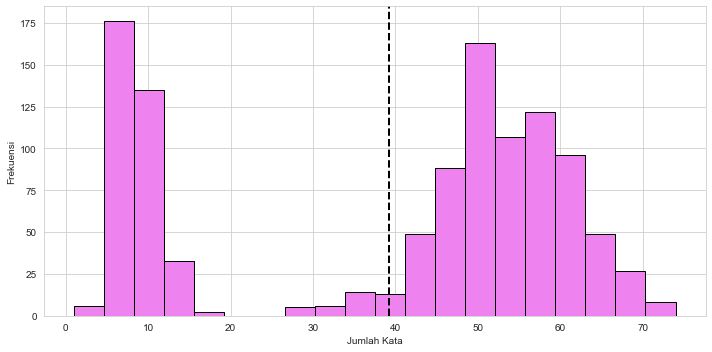

In [99]:
# Plot jumlah kata yang digunakan beserta frekuensinya
plt.figure(1,figsize = (10,5))
plt.hist(desc_lengths, density=False, bins=20,color = 'violet',edgecolor='black')
plt.axvline(np.average(desc_lengths), color='k', linestyle='dashed', linewidth=2)
plt.ylabel('Frekuensi')
plt.xlabel('Jumlah Kata');
plt.tight_layout()
plt.show()

Sebagian besar hotel sudah memberikan deskripsi yang cukup banyak, dilihat dari cukup banyak hotel yang panjang deskripsinya di atas rata-rata , yaitu 39 kata. Namun masih banya hotel yang hanya memberikan deskripsi singkat sebanyak 1- 10 kata saja, dan mungkin kurang menarik untuk para calon pengunjung.

## Review Analysis

### Korelasi antara lama menginap, jumlah orang serta rating yang diberikan
Untuk analisa dataframe review, penulis ingin melihat apakah ada pengaruh yang signifikan antara variabel durasi menginap dan jumlah tamu terhadap rating yang diberikan untuk tiap hotel menggunakan heatmap dan pearson correlation

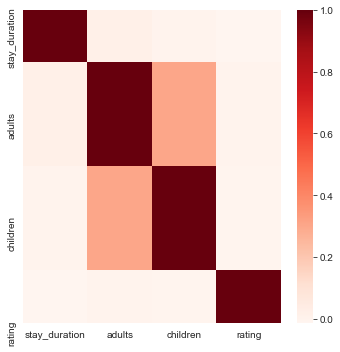

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(review.corr(),cmap='Reds',annot=False)
plt.tight_layout()

In [105]:
review.corr(method='pearson')

,stay_duration,adults,children,rating
stay_duration,1.000000,0.020079,0.001333,-0.013479
adults,0.020079,1.000000,0.303652,0.001924
children,0.001333,0.303652,1.000000,-0.002190
rating,-0.013479,0.001924,-0.002190,1.000000


Terlihat dari grafik heatmap antara children, adults, serta stay_duratin dengan rating memiliki warna cerah, yang berarti tidak ada korelasi yang signifikan antara ketiga variabel dan rating. Tabel korelasi pearson juga menunjukkan angka korelasi ketiga variabel mendekati nol (kolom paling kanan). Hal ini berarti durasi menginap serta jumlah tamu yang menginap bisa kita abaikan saat membentuk model

### Distribusi rating untuk tiap hotel

Untuk melihat distribusi rating tiap hotel, perlu dilakukan grouping berdasarkan nama hotel untuk mencari count dan average rating per hotel. Hal ini sudah dilakukan sebelumnya di bagian "2 apakah rating penting". Dengan describe kita dapat melihat informasi kuantitatif untuk tiap kolom di dataframe review, yang kemudian diplot ke dalam grafik

In [115]:
review_rating.describe()

,count,rating
count,408.000000,408.000000
mean,9.394608,8.371492
std,3.804003,0.976643
min,1.000000,2.000000
25%,10.000000,7.990000
50%,10.000000,8.480000
75%,10.000000,9.000000
max,20.000000,10.000000


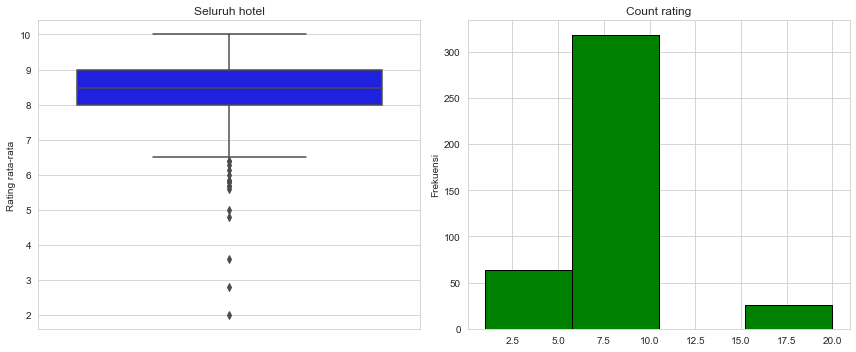

In [128]:
# plotting
plt.figure(1,figsize = (12,5))
plt.subplot(121)
sns.set_style('whitegrid')
sns.boxplot(review_rating['rating'],color='blue',orient='v')
plt.title('Seluruh hotel')
plt.ylabel('Rating rata-rata')

plt.subplot(122)
plt.hist(review_rating['count'], density=False, bins=4,color = 'green',edgecolor='black')
plt.title('Count rating')
plt.ylabel('Frekuensi')
plt.tight_layout()

Rata-rata nilai rating untuk tiap hotel berada di angka 8.3, dengan standar deviasi 0.97. Artinya user memberikan rating yang cukup baik kepada masing masing hotel, dan rating dibawah angka 7 dapat dianggap sebagai outlier/sangat jarang terjadi. Jumlah vote/count untuk tiap hotel mayoritas berada di antara 6 sampai 10 jumlah vote

# FITUR YANG DIGUNAKAN

Fitur - fitur yang akan dimasukkan ke dalam pemodelan adalah :
   
   1. Count dan rating : untuk kasus pertama menggunakan model simple recommender system
   2. Hotel description : informasi mengenai tiap hotel akan menjadi basis untuk melihat kemiripan antara satu hotel dengan yang lainnya
   3. Hotel province, city, dan address : informasi ini berguna untuk mengutamakan hotel yang berada di lokasi yang sama untuk direkomendasikan
   4. Review : melihat similarity review antar hotel 

# PEMODELAN 
## 1. Kasus 1 : Simple Recommender

Langkah pertama adalah menggabungkan dataframe review_rating yang berisi informasi rating rata-rata tiap hotel dengan dataframe hotel menjadi dataframe dengan nama data_join

In [163]:
# join review_rating ke dataframe hotel
data_join = hotel.set_index('name').join(review_rating.set_index('name')).reset_index()
data_join = data_join.dropna()

Selanjutnya kita akan menentukan nilai m, yaitu jumlah minimum vote yang dibutuhkan. Mengacu pada referensi dari modul DQLab, digunakan m yaitu 80% dari data, atau dalam hal ini minimum 10 vote

In [166]:
# menghitung nilai m
m = data_simple['count'].quantile(0.8)

# fungsi untuk menentukan Weighted Rating masing2 hotel
def weightedRating(df,var):
    v = df['count']
    R = df['rating']
    C = df['rating'].mean()
    m = df['count'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C #Rumus WR
    return df['score']

weightedRating(data_join,0.8)
print()

Terakhir kita membuat sistem rekomendasi yang dapat menerima input seperti lokasi kota dan provinsi dari user dan mengembalikan rekomendasi hotel berdasarkan rating terbaik

In [172]:
# model rekomendasi yang menampilkan rekomendasi 5 hotel terbaik 

def simpleRecommender(df,province,city,top=5):
    # specified the province
    df = df[df['province'] == province]
    
    # specified the city
    df = df[df['city'] == city]
    
    # filter hotels with count > m
    df = df[df['count'] >= m]
    df = df.sort_values(by = 'score', ascending = False)
    
    # take top 5 hotels
    df = df[:top]
    return df

In [175]:
# mengurutkan hotel hasil rekomendasi berdasarkan harga terendah
simpleRecommender(data_join,'Jawa Timur','Surabaya').sort_values(by='price_per_night')

,name,id,description,province,city,address,price_per_night,count,rating,score
200,Evora Hotel Surabaya,h0007,Ketika bisnis dan kenyamanan sinergi di satu t...,Jawa Timur,Surabaya,"Jl. Menur 18 - 20, Surabaya, Indonesia",283000,10.0,9.04,8.704727
701,Neo+ Waru Sidoarjo by ASTON,h0010,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Surabaya,"Jl. S. Parman No. 52-54, Waru, Sidoarjo, Surab...",293120,10.0,9.48,8.924727
101,Best Western Papilio Hotel,h0016,Welcome to Best Western Papilio Hotel!,Jawa Timur,Surabaya,"Jl. Ahmad Yani 176 - 178, Surabaya",305890,10.0,9.52,8.944727
1093,favehotel Sidoarjo,h0011,Penginapan Yang Tenang Dan Nyaman di Sidoarjo.,Jawa Timur,Surabaya,"Jl. Jenggolo No. 15, Pucang, Kec. Sidoarjo, Ka...",447220,10.0,9.08,8.724727
1054,Yello Hotel Jemursari,h0032,Sebuah hotel yang nyaman dan strategis di Sura...,Jawa Timur,Surabaya,"Jl. Raya Jemursari 176, Surabaya, Jawa Timur, ...",513000,10.0,9.28,8.824727


## 2. Kasus 2 : Content-Based Filtering

Pada kasus ini, content based filtering menggabungkan informasi seperti deskripsi hotel, alamat, lokasi dan review ke dalam satu 'bag of words' yang akan diubah menjadi vektor matematis. Khusus untuk review, perlu dilakukan manipulasi untuk menggabungkan review yang bermacam-macam untuk tiap hotel sehingga menjadi satu kesatuan string sebelum digabungkan dengan fitur lainnya

In [180]:
# menggabungkan review untuk tiap hotel ke dalam satu string panjang
review_group = review.groupby('name')['review'].apply(list).reset_index()
review_group['review'] = review_group['review'].apply(lambda x : ",".join(x))
review_group.head()

,name,review
0,45 Residence,Not recommended
1,7 Days Premium Hotel,"Hotel terburuk yg pernah sy singgahi..,Nice ho..."
2,AONE Hotel,"Hotel bersih dan strategis,Lokasi hotel strate..."
3,AYANA Midplaza Jakarta,"Goodplace,Recommended,Recommended,Liburan kelu..."
4,Adimulia Hotel Medan,"Bagus,Hotelnya keren,Jw mariot,Hotelnya ckup m..."


Selanjutnya adalah menggabungkan review untuk tiap hotel tersebut ke dalam dataframe hotel. Untuk hotel-hotel yang tidak memiliki data review, maka diset value reviewnya menjadi unknown

In [183]:
# join review dengan datset hotel, dan mengisi nilai review NULL dengan unknown
content_join = hotel.set_index('name').join(review_group.set_index('name')).reset_index()
content_join = content_join.fillna("unknown")

Berikutnya, sebelum menggabungkan semua fitur menjadi satu 'bag of words', kita akan 'membersihkan' teks di dalam fitur untuk menghilangkan tanda baca dari tiap fitur, merubah semua kata menjadi lowercase, serta menghilangkan stopwords. Bahasa Indonesia dan Bahasa Inggris terdapat di beberapa fitur, sehingga kita perlu menghilangkan stopwords untuk kedua bahasa. Stopwords bahasa Indonesia didapat menggunakan library sastrawi, sedangkan stopwords bahas inggris menggunakan library nltk

In [189]:
# import library Sastrawi,re dan nltk
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords

# set special character dan symbol yang ingin dihilangkan
clean_spcl = re.compile('[/(){}\[\]\|@,;] ') 
clean_symbol = re.compile('[^0-9a-z #+_]')
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover() 
stopworda = set(stopwords.words('english')) # set stopwords untuk bahasa inggris

feature = ['description','province','city','address','review'] # list berisi feature yang akan dibersihkan

# fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text)
    text = text.lower() # lowercase text
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    text = stopword.remove(text) # hapus stopword b. indonesia 
    text = ' '.join(word for word in text.split() if word not in stopworda) # hapus stopword b.inggris
    return text

# apply fungsi ke tiap kolom fitur
for col in feature:
    content_join[col] = content_join[col].apply(clean_text)

Berikutnya kita akan menggabungkan semua fitur yang sudah dibersihkan ke dalam kolom baru bernama soup

In [191]:
# fungsi untuk menggabungkan kesemua fitur
def soup_feature(x):
    return ''.join(x['description']) + ' ' + ''.join(x['province']) + ' ' + ''.join(x['city']) + ' ' + ''.join(x['address']) + ' ' + ''.join(x['review'])

# membuat soup menjadi 1 kolom 
content_join['soup'] = content_join.apply(soup_feature,axis=1)

In [192]:
print(content_join.loc[0,'soup'],"\n") 

45 residence located heart business area jakarta 45 residence located heart business area jakarta safe comfortable away noise city suitable businessman expatriates dki jakarta jakarta barat jl mangga besar xi rw 1 kota tua tangki tamansari kota jakarta barat dki jakarta indonesia recommended 



In [421]:
#import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#definisikan CountVectorizer dan mengubah soup tadi menjadi bentuk vector
count = CountVectorizer()
count_matrix_a = count.fit_transform(content_join['soup'])
count_matrix_b = count.fit_transform(content_join_sas['soup'])

#testing tfidf vectorizer
tf = TfidfVectorizer()
tf_matrix_a = tf.fit_transform(content_join['soup'])
tf_matrix_b = tf.fit_transform(content_join_sas['soup'])

In [422]:
#Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Gunakan cosine_similarity antara count_matrix 
cosine_sim_a = cosine_similarity(count_matrix_a, count_matrix_a)
cosine_sim_b = cosine_similarity(count_matrix_b, count_matrix_b)

#Cosine similarity dengan tf
tf_sim_a = cosine_similarity(tf_matrix_a,tf_matrix_a)
tf_sim_b = cosine_similarity(tf_matrix_b,tf_matrix_b)

In [442]:
# membuat rekomendasi 
indices = pd.Series(content_join.index, index=content_join['name']).drop_duplicates()

# base dataframe sebagai output rekomendasi
base = content_join.drop(columns=['review','soup'])
def content_recommender(hotel):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[hotel]

    #menjadikan list dari array similarity cosine sim 
    #hint: cosine_sim[idx]
    sim_scores = list(enumerate(cosine_sim_a[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
    
    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]
    hotels = base.iloc[movie_indices]
    #hotels = hotels[hotels['city'] == 'jogja']
    #hotels = hotels[hotels['province'] == 'daerah istimewa yogyakarta']
    hotels = hotels[0:5]
    hotels = hotels.append(base[base['name'] == hotel])

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return hotels

content_recommender("La Oma")


,name,id,description,province,city,address,price_per_night
732,Hotel Alpha Classica,h0834,alamat jalan tangkuban perahu 25 lembang check...,jawa barat,bandung,jalan tangkuban perahu 25 lembang,300000
729,Hotel Family Bandung,h0831,alamat jalan cikutra 167 bandung check standar...,jawa barat,bandung,jalan cikutra 167 bandung,384980
737,Orange Homes Syariah,h0839,alamat jalan babakan jeruk 1 76 bandung check ...,jawa barat,bandung,jalan babakan jeruk 1 76 bandung,296670
722,Mercure Bandung Nexa Supratman,h0824,alamat jalan wr supratman 66 68 check standar ...,jawa barat,bandung,jalan wr supratman 66 68,493500
936,D'Talent Hotel,h1038,alamat jalan prawirotaman 3 66 check standar 1...,daerah istimewa yogyakarta,jogja,jalan prawirotaman 3 66,300000
738,La Oma,h0840,alamat jalan cijeruk 62 lembang check standar ...,jawa barat,bandung,jalan cijeruk 62 lembang,800000


In [270]:
# pakai ntlk indonesian,english stopwords
import re
from nltk.corpus import stopwords
clean_spcl = re.compile('[/(){}\[\]\|@,;] ')
clean_symbol = re.compile('[^0-9a-z #+_]')
stopworda = set(stopwords.words(['indonesian','english']))

metadata = ['description','province','city','address','review']
def clean_text(text):
    text = str(text)
    text = text.lower() # lowercase text
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    text = ' '.join(word for word in text.split() if word not in stopworda) # hapus stopword dari tiap kolom
    return text
for col in metadata:
    content_join[col] = content_join[col].apply(clean_text)
content_join

,name,id,description,province,city,address,price_per_night,review
0,favehotel Graha Agung Surabaya,h0002,hotel mewah surabaya persembahan archipelago i...,jawa timur,surabaya,jl mayjen yono soewoyo pakuwon indah square ak...,442860,hotel yang menyenangkan hotel bersih wangi bag...
1,The Sun Hotel Sidoarjo,h0003,hotel bintang 3 satunya sidoarjo,jawa timur,surabaya,jl pahlawan 1 sidokumpul sidoarjo surabaya jaw...,305000,good bisnis travel 18 des 19 hotel yang sukai ...
2,Grand Surabaya Hotel,h0004,penginapan yang tenang nyaman surabaya,jawa timur,surabaya,jl pemuda 19 21 surabaya indonesia,325000,hotel strategis kamar luas bathub hotel yg str...
3,The WIN Hotel Surabaya,h0005,win hotel hotel smart bintang 3 yang menawarka...,jawa timur,surabaya,jl embong tanjung 46 48 surabaya jawa timur in...,310950,menyenangkan good facilities pelayanan hotel y...
4,POP! Hotel Stasiun Kota Surabaya,h0006,hotel modern yang terjangkau jawa timur,jawa timur,surabaya,jl waspada 58 surabaya jawa timur indonesia,276330,hotel terbaik hotel yg bersih sesuai budget ho...
...,...,...,...,...,...,...,...,...
1093,Restu Hotel Yogyakarta,h1195,akomodasi yang nyaman modern yogyakarta akomod...,daerah istimewa yogyakarta,jogja,jl batikan 7 pandeyan kec umbulharjo kota yogy...,150000,unknown
1094,Oryza Hotel Malioboro,h1196,ideal accommodation options malioboro area yog...,daerah istimewa yogyakarta,jogja,sosrowijayan st 49 51 sosromenduran gedong ten...,180000,unknown
1095,Hotel Asri Graha Yogyakarta,h1197,pilihan akomodasi yang ideal pasangan backpack...,daerah istimewa yogyakarta,jogja,jl veteran 184 umbulharjo yogyakarta yogyakart...,262500,unknown
1096,Tasneem Convention Hotel Yogyakarta,h1198,pilihan akomodasi yang ideal pasangan backpack...,daerah istimewa yogyakarta,jogja,kawasan mandira baruga jl brigjen katamso kepa...,391670,unknown


### Testing TFIDF

In [440]:
# membuat rekomendasi 
indices = pd.Series(content_join.index, index=content_join['name']).drop_duplicates()

# base dataframe sebagai output rekomendasi
base = content_join.drop(columns=['review','soup'])
def content_recommender(hotel):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[hotel]

    #menjadikan list dari array similarity cosine sim 
    #hint: cosine_sim[idx]
    sim_scores = list(enumerate(tf_sim_a[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
    
    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]
    hotels = base.iloc[movie_indices]
    #hotels = hotels[hotels['city'] == 'jogja']
    #hotels = hotels[hotels['province'] == 'daerah istimewa yogyakarta']
    hotels = hotels[0:5]
    hotels = hotels.append(base[base['name'] == hotel])

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return hotels

content_recommender("Four Seasons Hotel Jakarta")

,name,id,description,province,city,address,price_per_night
423,Mercure Jakarta Gatot Subroto,h0525,,dki jakarta,jakarta,jalan gatot subroto kav 1,670050
503,favehotel Gatot Subroto,h0605,hotel bisnis gatot subroto jakarta persembahan...,dki jakarta,jakarta,jl kartika chandra kav a9 jakarta indonesia,438500
719,Hotel Harapan Indah,h0821,penginapan yang nyaman aman bandung hotel hara...,jawa barat,bandung,jl gatot subroto 45 b lengkong bandung indonesia,222500
398,Hotel Bidakara Grand Pancoran Jakarta,h0500,hotel bidakara grand pancoran jakarta hotel bi...,dki jakarta,jakarta selatan,jl gatot subroto kav 71 73 rt 8 rw 8 menteng k...,652500
488,Amaris Hotel Slipi,h0590,pilihan akomodasi yang ideal pasangan backpack...,dki jakarta,jakarta barat,jl let jend parman raya kav 92 tanah abang sli...,424180
449,Four Seasons Hotel Jakarta,h0551,,dki jakarta,jakarta,capital place jalan jend gatot subroto kav 18,4047660


In [439]:
print(hotel_test.iloc[1010,2])
print(hotel_test.iloc[1013,2])
print("\n",hotel_test.iloc[1095,2])

Penginapan Yang Cocok Untuk Bisnis Dan Bersantai 
 
 Terletak strategis di jalan utama di Yogyakarta, Hotel Tentrem Yogyakarta pasti akan mengakomodasi wisatawan bisnis maupun para tamu wisatawan yang mencari sebuah hotel yang nyaman dan mewah yang terasa seperti rumah. Hotel Tentrem Yogyakarta juga menyediakan berbagai fasilitas untuk memperkaya penginapan Anda di Yogyakarta.
Pilihan akomodasi ideal untuk Backpacker, Liburan Keluarga dan Pasangan
 
 Berlokasi strategis di jalan Utama di Yogyakarta, Wisma Ary's Hotel pasti akan mengakomodasi wisatawan bisnis maupun wisatawan yang mencari tempat yang nyaman yang terasa seperti rumah. Wisma Ary's Hotel juga menawarkan berbagai fasilitas untuk memperkaya penginapan Anda di Yogyakarta.

 Pilihan akomodasi yang ideal untuk Pasangan, Backpacker dan Liburan Keluarga.
 
 Hotel Asri Graha Yogyakarta sebuah hunian yang berlokasi di Yogyakarta. Suasana ruangan yang bersih dan nyaman, cocok bagi Anda yang akan berlibur atau mengadakan kunjungan bi

# Testing Rekomendasi

In [408]:

def content_recommender(hotel):
    # menjadikan nama hotel menjadi indices sebagai acuan dari rekomendasi
    indices = pd.Series(content_join.index, index=content_join['name']).drop_duplicates()

    #mendapatkan index dari nama hotel yang dicari
    idx = indices[indices.index.map(lambda x: hotel in x)]
    
    # list kosong tempat menaruh hasil perhitungan similarity score
    tot = []
    
    # filter berdasarkan input user
    df = content_join[content_join['city'] == 'Jogja']
    df = content_join[content_join['province'] == 'daerah istimewa yogyakarta']
    
    # base dataframe sebagai output rekomendasi
    base = df.drop(columns=['review','soup'])
    
    # count vectorizer
    count = CountVectorizer()
    count_matrix_a = count.fit_transform(df['soup'])
    cosine_sim_a = cosine_similarity(count_matrix_a, count_matrix_a)
    
    print(cosine_sim_a)
    
    for i in idx:
        #menjadikan list dari array similarity cosine sim 
        sim_scores = list(enumerate(cosine_sim_a[i]))
        
        #mengurutkan film dari similarity tertinggi ke terendah
        sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)

        #untuk mendapatkan list judul dari item kedua sampe ke 11
        sim_scores = sim_scores[1:11]
        tot.append(sim_scores)

    flat_list = []
    for sublist in tot:
        for item in sublist:
            flat_list.append(item)
    flat_list = sorted(flat_list,key=lambda x:x[1],reverse=True)

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [k[0] for k in flat_list]
    x = set(movie_indices)
    y = set(base.index)
    z = y.intersection(x)
    print(x)
    print(y)
    print(z)
    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return base.iloc[z]

content_recommender("Santika")


[[1.         0.51986919 0.62814426 ... 0.66750922 0.64611891 0.61743213]
 [0.51986919 1.         0.53041777 ... 0.55593699 0.5739968  0.54601891]
 [0.62814426 0.53041777 1.         ... 0.59047257 0.58123819 0.55290734]
 ...
 [0.66750922 0.55593699 0.59047257 ... 1.         0.92141873 0.59024021]
 [0.64611891 0.5739968  0.58123819 ... 0.92141873 1.         0.57132598]
 [0.61743213 0.54601891 0.55290734 ... 0.59024021 0.57132598 1.        ]]


IndexError: index 311 is out of bounds for axis 0 with size 224

In [167]:
content_join

,name,id,description,province,city,address,price_per_night,list_review,review,review_2
0,favehotel Graha Agung Surabaya,h0002,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860,"[Hotel yang menyenangkan, Hotel bersih dan wan...",hotelyangmenyenangkanhotelbersihdanwangibaikba...,"[hotelyangmenyenangkan, hotelbersihdanwangi, b..."
1,The Sun Hotel Sidoarjo,h0003,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000,"[Very good, Bisnis travel 18 des 19, Hotel yan...",hotelyangmenyenangkanhotelbersihdanwangibaikba...,"[verygood, bisnistravel18des19, hotelyangdsuka..."
2,Grand Surabaya Hotel,h0004,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",325000,"[Hotel strategis, Kamar luas ada bathub, Hotel...",hotelyangmenyenangkanhotelbersihdanwangibaikba...,"[hotelstrategis, kamarluasadabathub, hotelygst..."
3,The WIN Hotel Surabaya,h0005,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310950,"[Menyenangkan, Good facilities, Pelayanan hote...",hotelyangmenyenangkanhotelbersihdanwangibaikba...,"[menyenangkan, goodfacilities, pelayananhotely..."
4,POP! Hotel Stasiun Kota Surabaya,h0006,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276330,"[Hotel terbaik, Hotel yg bersih dan sesuai bud...",hotelyangmenyenangkanhotelbersihdanwangibaikba...,"[hotelterbaik, hotelygbersihdansesuaibudget, h..."
...,...,...,...,...,...,...,...,...,...,...
1093,Restu Hotel Yogyakarta,h1195,Akomodasi yang nyaman dan modern di Yogyakarta...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",150000,NaN,hotelyangmenyenangkanhotelbersihdanwangibaikba...,
1094,Oryza Hotel Malioboro,h1196,Ideal accommodation options in the Malioboro a...,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",180000,NaN,hotelyangmenyenangkanhotelbersihdanwangibaikba...,
1095,Hotel Asri Graha Yogyakarta,h1197,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",262500,NaN,hotelyangmenyenangkanhotelbersihdanwangibaikba...,
1096,Tasneem Convention Hotel Yogyakarta,h1198,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",391670,NaN,hotelyangmenyenangkanhotelbersihdanwangibaikba...,


In [191]:
def sanitize(x):
    if isinstance(x, list):
    #Strip spaces and convert to lowercase
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
    #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [192]:
content_join['list_review'] = content_join['list_review'].apply(sanitize)
content_join

,name,id,description,province,city,address,price_per_night,list_review
0,favehotel Graha Agung Surabaya,h0002,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860,"[hotelyangmenyenangkan, hotelbersihdanwangi, b..."
1,The Sun Hotel Sidoarjo,h0003,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000,"[verygood, bisnistravel18des19, hotelyangdsuka..."
2,Grand Surabaya Hotel,h0004,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",325000,"[hotelstrategis, kamarluasadabathub, hotelygst..."
3,The WIN Hotel Surabaya,h0005,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310950,"[menyenangkan, goodfacilities, pelayananhotely..."
4,POP! Hotel Stasiun Kota Surabaya,h0006,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276330,"[hotelterbaik, hotelygbersihdansesuaibudget, h..."
...,...,...,...,...,...,...,...,...
1093,Restu Hotel Yogyakarta,h1195,Akomodasi yang nyaman dan modern di Yogyakarta...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",150000,
1094,Oryza Hotel Malioboro,h1196,Ideal accommodation options in the Malioboro a...,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",180000,
1095,Hotel Asri Graha Yogyakarta,h1197,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",262500,
1096,Tasneem Convention Hotel Yogyakarta,h1198,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",391670,


In [184]:
for x in content_join['review_2']:
    a = "".join(x)

In [193]:
content_join['review_2'] = content_join['review_2'].apply(lambda x : ",".join(x))

KeyError: 'review_2'

In [62]:
hotel_na = hotel.loc[hotel.hotel_description.isna(),]

In [ ]:
hotel.describe()

In [ ]:
hotel.info()

In [ ]:
def print_description(index):
    example = hotel[hotel.index == index][['hotel_description','hotel_name']].values[0]
    print(example)

In [ ]:
hotel[hotel['hotel_name'].str.contains("Santika")]